Firstly, we edit our data to prepare it for training.

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


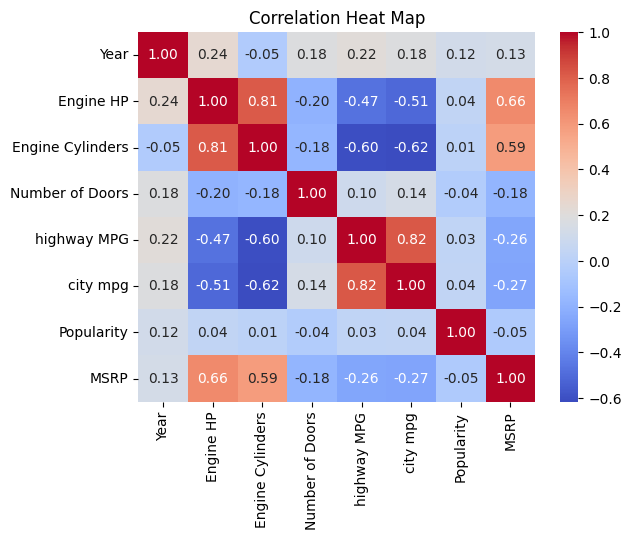

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print(df.columns)
print(df.isnull().sum())

df = df.dropna()

numeric_df = df.select_dtypes(include=['int64','float64'])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

Based on the heatmap analysis, a notable correlation is observed between Engine HP and MSRP. Consequently, we will proceed with a regression analysis to explore the relationship between these two variables.

In [9]:
import numpy as np

X = df['Engine HP'].values
X = X.reshape(-1,1)
y = df['MSRP'].values

After determining our X and Y variables, we first train the model and then evaluate it on the test set. The test results are presented both as an R² score and through visualizations for better interpretability.

r^2score : 0.8626167676666276


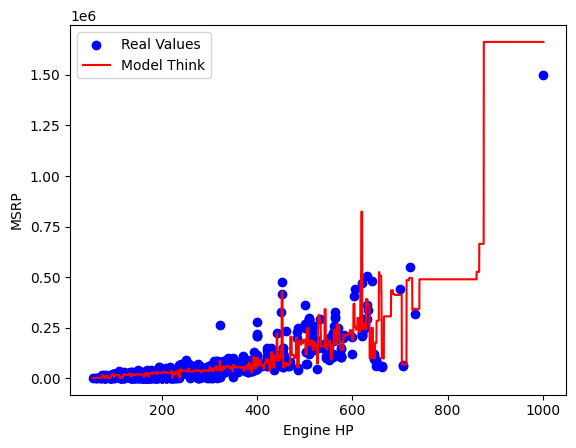

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=10,random_state=0)
model.fit(X_train,y_train)

X_grid = np.arange(X.min(),X.max(),0.1).reshape(-1,1)
y_grid = model.predict(X_grid)

y_predict = model.predict(X_test)
r2 = r2_score(y_test,y_predict)
print(f'r^2score : {r2}')

plt.scatter(X_test,y_test, color = 'b' , label = 'Real Values')

plt.plot(X_grid,y_grid,color='red',label='Model Think')

plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.legend()
plt.show()